<h1 style="color: Crimson;" > <center> ********Compte Rendu TP3: CLUSTERING****** </center></h1>
<h3 style="color : blue; text-align: right;">Réalisé par : Sabrine Hoiya </h3>

# <span style="color:blue ">I. Objectif</span>

#### L'objectif de ce TP est faire une segmentation (clustering) sur une image a fin de représenter l'image en des choses plus significatif et plus facile d'analyser.

<h3 style = "color:blue;">I. PARTIE THÉORIQUE</h3>

Le clustering est une méthode d'analyse statistique utilisée pour organiser des données brutes en silos homogènes.  A l'intérieur de chaque grappe, les données sont regroupées selon une caractéristique commune. L'outil d'ordonnancement est un algorithme qui mesure la proximité entre chaque élément à partir de critères définis.Pour établir l'équilibre, il minimise l'inertie à l'intérieur des classes et maximise celle entre les sous-groupes afin de bien les différencier. 

<h4>voici quelques exemples de segmentation des images avec l'algorithme de clustering </h4>

<img src="cluster.png">

<h3 style = "color:blue;"> II.PARTIE PRATIQUE </h3>

<h3 style = "color:blue;"> Partie 1:K-means </h3>

#### Dans cette partie, on s'interesse au a l'effet de clustering sur l'image en modifiant a chaque fois le nombre de cluster dans l'algorithme de k-means.


<h4> Tout d'acord on va installer la bilbliothéque "OPEN-CV" : </h4>

In [1]:
!pip install opencv-python


You should consider upgrading via the 'c:\users\sabrine\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


<h4>On va installer la bilbliothéque "scikit-learn" : </h4>


In [5]:
pip install scikit-image


You should consider upgrading via the 'c:\users\sabrine\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


#### Et on applique k-means pour la segmentation :

In [6]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import skimage.io
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def segm(k):
    image= cv2.imread('macha.jpg')

    (h1, w1) = image.shape[:2]

    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    image = image.reshape((image.shape[0] * image.shape[1], 3))


    clt = KMeans(n_clusters = k)

    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

    cv2.imwrite('macha2.jpg', quant)
    return plt.imshow(quant)
cv2.imread('macha.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
interact(segm,k=widgets.IntSlider(min=2, max=10, step=1, value=2));

interactive(children=(IntSlider(value=2, description='k', max=10, min=2), Output()), _dom_classes=('widget-int…

## <span style="color:	blue ">Partie 2: Application des bruits :</span>

### Dans cette partie, on va concentrer sur l'image bruitée, et on va ajouter des types de bruit à notre image:
- **`Gaussian`**
- **`Localvar`**
- **`Poisson`**
- **`Salt`**
- **`pepper`**
- **`s&p`**
- **`speckle`**


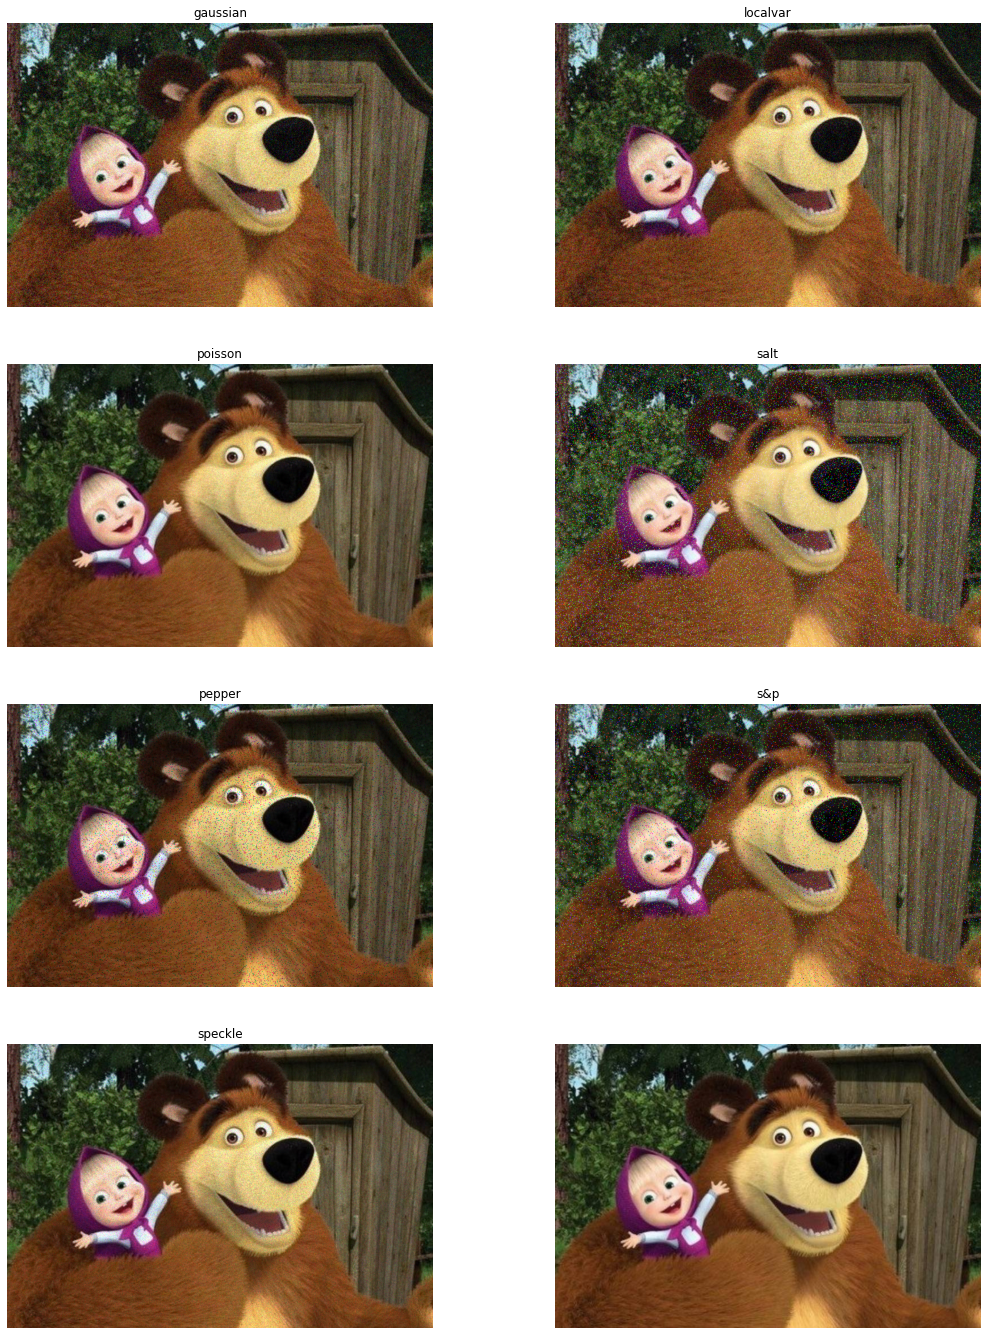

In [8]:
import skimage.io
import matplotlib.pyplot as plt
img_path="macha.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()

<h3 style = "color:blue;"> III.CONCLUSION GÉNÉRALE </h3>

#### D'aprés ce TP on peut conclure que: 
#### *le clustering est une étape fondamentale dans data mining et l'exploitation des données pour determiner les couleurs dominants dans l'image
#### *lorqu'on augmente le nombre de clusters , l'image segmentée proche de l'image originale
#### * il ya plusieurs types de bruits qui peuvent affecter l'image 
